QUESTION 1 ANALYTICAL SOLUTION

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

def analytical_soln(k,u_avg,mesh_points,Temp_nm):
  #now we will define our properties in the problem
  k = k
  u_avg = u_avg
  T_mean_entrance = 700 #mean entrance temperature
  T_mean_exit = 300 #mean exit temperature
  Length = 1.0 #Length of the pipe
  Density = 0.6949 #Density of the fluid
  c = 1000 #Specific Heat

  #Now lets write the grid specifications
  mesh_points = mesh_points
  X = np.linspace(0,Length,mesh_points)
  dx = Length/(mesh_points-1)

  #now we will define our constants in the problem
  Gamma = k / (c)
  Pe = Density * u_avg * Length / Gamma

  #Lets use TDMA to get Temperature profile
  Temp_profile_ana = np.zeros(mesh_points)
  for i in range(0,mesh_points):
    Temp_profile_ana[i] = ((T_mean_exit-T_mean_entrance)*((mt.exp(Pe*X[i]/Length) - 1)/(mt.exp(Pe/Length) -1))) + T_mean_entrance

  Error =  0
  for i in range(0,mesh_points):
    Error = Error + (abs(Temp_profile_ana[i] - Temp_nm[i]))**2
  Error = Error / mesh_points
  Error = mt.sqrt(Error)
  print("Error is: ",Error)
  plt.plot(X,Temp_profile_ana,color="red",linestyle = 'dotted')
  plt.xlabel("X_coordinates")
  plt.ylabel("Temprature")
  plt.title("Temperature Profile along Pipe Length (ANALYTICAL)")

QUESTION 1 (CDS) (TDMA)

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
  #print(type(low))
  # print(type(upp))
  P    = np.zeros(num)
  Q    = np.zeros(num)
  # print(P.shape)

  # Forward elimination
  P[0] = -upp[0]/dia[0]
  Q[0] =  uPrev[0]/dia[0]
  for i in range(1, mesh_points):
    # print(type(dia[i]))
    # print(type(low[i]))
    # print(type(P[i]))
    P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
    Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

  # Backward Substitution
  u[-1] = Q[-1]
  for i in range(mesh_points-2,-1,-1):
    u[i] = P[i]*u[i+1]+Q[i]
  return u

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat

#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)
#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
ae = De - (Fe/2)
aw = Dw + (Fw/2)
ap = ae + aw + (Fe - Fw)

#Now we will start defining our l,u,d array for TDMA application
d  = np.zeros(mesh_points)        # main diagonal elements
u  = np.zeros(mesh_points)        # upper diagonal
l  = np.zeros(mesh_points)        # lower diagonal

# Construct the elements of the coefficient matrix
l[0]  = 0.0
u[0]  = 0.0
d[0]  = 1.0
l[-1] = 0.0
u[-1] = 0.0
d[-1] = 1.0
for i in range(1,mesh_points-1):
  d[i] =  ap
  l[i] = -aw
  u[i] = -ae

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit
for i in range(1,mesh_points-1):
  RHS[i] = 0

#Lets use TDMA to get Temperature profile
Temp_profile = np.zeros(mesh_points)
Temp_profile = tdma(mesh_points, d, u, l, RHS, Temp_profile)
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temperature")
plt.title("Temperature Profile along Pipe Length (CDS)")

#Now we will plot the error

KeyboardInterrupt: ignored

QUESTION 1 (CDS) (GAUSS-SIEDEL) (WITHOUT DMD)

Error is:  0.0017984948847205818
Elapsed time: 9261.859239339828 seconds


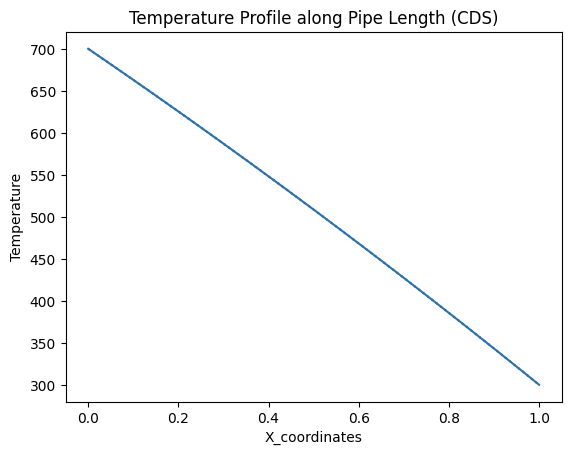

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time
norm_collect_1 = []
def gauss_seidel(A, b, x0, tol=1e-6, max_iter=1000000000000000):

    n = len(b)
    x = np.copy(x0)
    iterations = 0

    while iterations < max_iter:
        x_prev = np.copy(x)

        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:])) / A[i, i]

        if np.max(abs(np.matmul(A,x)-b)) < tol:
            break
        norm_collect_1.append(np.max(abs(np.matmul(A,x)-b)))
        iterations += 1

    return x, iterations

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat

#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)
#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
ae = De - (Fe/2)
aw = Dw + (Fw/2)
ap = ae + aw + (Fe - Fw)

A = np.zeros((mesh_points, mesh_points))
# Construct the elements of the coefficient matrix
for i in range (1,mesh_points-1):      # For the inner nodes
    A[i][i]   = ap
    A[i][i-1] = -aw
    A[i][i+1] = -ae
A[0][0]     = 1.0               # For boundary node
A[-1][-1]   = 1.0               # For boundary node

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit


#Lets use TDMA to get Temperature profile
start_time = time.time()
Temp_pf_old = np.linspace(T_mean_entrance,T_mean_exit,mesh_points)
Temp_profile , iterations = gauss_seidel(A, RHS, Temp_pf_old)
elapsed_time = time.time() - start_time
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temperature")
plt.title("Temperature Profile along Pipe Length (CDS)")
norm_collect_1 = norm_collect_1
#print(iterations)
#print(norm_collect_1)
print("Elapsed time:", elapsed_time, "seconds")
#Now we will plot the error

QUESTION 1 (CDS) (GAUSS-SIEDEL)(DMD)

Streaming output truncated to the last 5000 lines.
1.048283593263477e-06
1.048276317305863e-06
1.0482690413482487e-06
1.0482544894330204e-06
1.0482472134754062e-06
1.048239937517792e-06
1.0482326615601778e-06
1.0482181096449494e-06
1.048203557729721e-06
1.048203557729721e-06
1.0481890058144927e-06
1.0481744538992643e-06
1.0481671779416502e-06
1.048159901984036e-06
1.0481453500688076e-06
1.0481380741111934e-06
1.0481307981535792e-06
1.0481162462383509e-06
1.0481089702807367e-06
1.0480944183655083e-06
1.0480871424078941e-06
1.0480725904926658e-06
1.0480725904926658e-06
1.0480580385774374e-06
1.048043486662209e-06
1.0480362107045949e-06
1.0480289347469807e-06
1.0480143828317523e-06
1.0480143828317523e-06
1.047999830916524e-06
1.0479852790012956e-06
1.0479780030436814e-06
1.0479707270860672e-06
1.0479561751708388e-06
1.0479561751708388e-06
1.0479343472979963e-06
1.047927071340382e-06
1.047919795382768e-06
1.0479125194251537e-06
1.0479052434675395e-06
1.047883415594697e-06
1.047876139637082

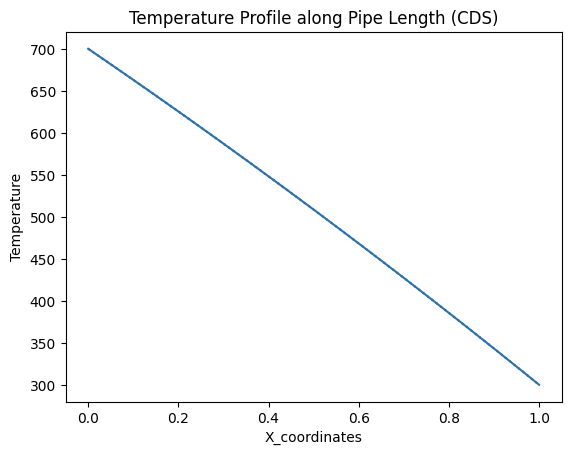

NameError: ignored

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time
# Now we will integrate the Dynamic Mode Decomposition
#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2

def DMDsolver(X_given,r,no_predictions,dt):
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :]
  #R, C = X.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  U, E, Vt = np.linalg.svd(X1, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  """In the next step we obtain the matrix A_bar which is an second and important step in DMD algo, this matrix is obtained by multiplication
  of the truncated  matrices"""
  A_bar = np.matmul((np.matmul(np.matmul(U[:, : r].conj().T,X2),Vt[: r, :].conj().T)),np.diag(np.reciprocal(E[: r])))
  '''In the following step we obtain the eigen decomposition of the matrix A_bar into two matrices Phi and Q representing eigen values
  and eigen vectors matrices respectively'''
  Phi, Q = np.linalg.eig(A_bar)
  '''The following step we find Psi matrix in order to find A matrix '''
  Psi=np.matmul(np.matmul(np.matmul(X2,Vt[: r, :].conj().T),np.diag(np.reciprocal(E[: r]))),Q) #dmd mode
  #Here we go to the final step of finding our matrix A which is the root of DMD prediction
  A=np.matmul(np.matmul(Psi,np.diag(Phi)),np.linalg.pinv(Psi)) #not needed from this line for finite differences
  x2 = X2[:,-1]
  #print(Psi)
  bi = (np.matmul(np.linalg.pinv(Psi),x2))
  dd1 = ((bi[0])*(Psi[:,0])).real
  dd2 = ((bi[1])*(Psi[:,1])).real
  dd3 = ((bi[2])*(Psi[:,2])).real
  dd4 = ((bi[3])*(Psi[:,3])).real
  dd5 = np.zeros(len(dd1))
  for i in range(len(dd1)):
   dd5[i] = dd1[i] + dd2[i] + dd3[i] #+dd4[i]
  return dd5 #returning predicted values matrix

norm_collect = []         # To collect the norm

def gauss_seidel(A, b, x0, tol=1e-6, max_iter=1000000000000000):

    Y=list([])
    lo = 1
    n = len(b)
    ic =0
    nu=0
    dt = 1
    x = np.copy(x0)
    iterations = 0
    norm_m = 1
    PPP=0
    while (norm_m>=tol):

      if ((norm_m)>=0.001 and (PPP<=1)):
        x_prev = np.copy(x)

        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:])) / A[i, i]

        norm_m =np.max(abs(np.matmul(A,x)-b))
        print(norm_m)
        norm_collect.append(norm_m)
        iterations += 1
        nu = iterations
        ic = iterations

      else:
        PPP = 5
        x_prev = np.copy(x)
        if ((iterations==nu) and (lo<=20) and (iterations==ic)):
          Y.append(x_prev)
          nu=nu+20
          ic=ic+20
          if (lo==20):
            #print(1111111111123456789999999999999998765)
            Y = np.array(Y)
            Y = Y.transpose()
            x_prev = DMDsolver(Y,5,1,dt)
            ic = ic + 1255555555555555555555555555555555555555555555500
            nu = iterations
            Y=list([])
            lo = 0
            #print(nu,ic,iter)

          lo=lo+1
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:])) / A[i, i]

        norm_m = np.max(abs(np.matmul(A,x)-b))
        print(norm_m)
        norm_collect.append(norm_m)
        iterations += 1
        if (iterations ==ic):
          nu =iterations


    return x, iterations

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat

#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)
#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
ae = De - (Fe/2)
aw = Dw + (Fw/2)
ap = ae + aw + (Fe - Fw)



A = np.zeros((mesh_points, mesh_points))
# Construct the elements of the coefficient matrix
for i in range (1,mesh_points-1):      # For the inner nodes
    A[i][i]   = ap
    A[i][i-1] = -aw
    A[i][i+1] = -ae
A[0][0]     = 1.0               # For boundary node
A[-1][-1]   = 1.0               # For boundary node

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit


#Lets use TDMA to get Temperature profile
start_time = time.time()
Temp_pf_old = np.linspace(T_mean_entrance,T_mean_exit,mesh_points)
Temp_profile , iterations = gauss_seidel(A, RHS, Temp_pf_old)
elapsed_time = time.time() - start_time
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temperature")
plt.title("Temperature Profile along Pipe Length (CDS)")
norm_collect = norm_collect

plt.show()
#Now we will plot the error
norm_collect = np.array(norm_collect)
#norm_collect_1 = np.array(norm_collect_1)
iter = np.linspace(1,len(norm_collect),len(norm_collect))
#iter_1 = np.linspace(1,len(norm_collect_1),len(norm_collect_1))
plt.plot(iter,norm_collect)
plt.yscale('log')
plt.xlabel("iterations")
plt.ylabel("norm")
plt.title("Norm vs Ierations")
'''plt.plot(iter_1,norm_collect_1)
plt.yscale('log')
plt.xlabel("iterations")
plt.ylabel("norm")
plt.title("Norm vs Ierations")
'''
print("Elapsed time:", elapsed_time, "seconds")


QUESTION 1 (CDS) (GAUSS-SIEDEL)(POD)

In [15]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time
# Now we will integrate the Dynamic Mode Decomposition
#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2


def PODsolver(X_given,r,no_predictions,dt):
  U, E, Vt = np.linalg.svd(X_given, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  Vtt = [[row[0] for row in Vt[0,:]]]
  dd1 = (E[0])*(np.matmul(U[:,0],Vtt))
  print(dd1)
  print(E)
  return (dd1).real #returning predicted values matrix

norm_collect = []         # To collect the norm

def gauss_seidel(A, b, x0, tol=1e-6, max_iter=1000000000000000):

    Y=list([])
    lo = 1
    n = len(b)
    ic =0
    nu=0
    dt = 1
    x = np.copy(x0)
    iterations = 0
    norm_m = 1
    PPP=0
    while (norm_m>=tol):

      if ((norm_m)>=0.001 and (PPP<=1)):
        x_prev = np.copy(x)

        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:])) / A[i, i]

        norm_m =np.max(abs(np.matmul(A,x)-b))
        print(norm_m)
        norm_collect.append(norm_m)
        iterations += 1
        nu = iterations
        ic = iterations

      else:
        PPP = 5
        x_prev = np.copy(x)
        if ((iterations==nu) and (lo<=20) and (iterations==ic)):
          Y.append(x_prev)
          nu=nu+20
          ic=ic+20
          if (lo==20):
            #print(1111111111123456789999999999999998765)
            Y = np.array(Y)
            Y = Y.transpose()
            x_prev = PODsolver(Y,5,1,dt)
            ic = ic + 1255555555555555555555555555555555555555555555500
            nu = iterations
            Y=list([])
            lo = 0
            #print(nu,ic,iter)

          lo=lo+1
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_prev[i + 1:])) / A[i, i]

        norm_m = np.max(abs(np.matmul(A,x)-b))
        print(norm_m)
        norm_collect.append(norm_m)
        iterations += 1
        if (iterations ==ic):
          nu =iterations


    return x, iterations

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat

#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)
#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
ae = De - (Fe/2)
aw = Dw + (Fw/2)
ap = ae + aw + (Fe - Fw)



A = np.zeros((mesh_points, mesh_points))
# Construct the elements of the coefficient matrix
for i in range (1,mesh_points-1):      # For the inner nodes
    A[i][i]   = ap
    A[i][i-1] = -aw
    A[i][i+1] = -ae
A[0][0]     = 1.0               # For boundary node
A[-1][-1]   = 1.0               # For boundary node

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit


#Lets use TDMA to get Temperature profile
start_time = time.time()
Temp_pf_old = np.linspace(T_mean_entrance,T_mean_exit,mesh_points)
Temp_profile , iterations = gauss_seidel(A, RHS, Temp_pf_old)
elapsed_time = time.time() - start_time
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temperature")
plt.title("Temperature Profile along Pipe Length (CDS)")
norm_collect = norm_collect

plt.show()
#Now we will plot the error
norm_collect = np.array(norm_collect)
#norm_collect_1 = np.array(norm_collect_1)
iter = np.linspace(1,len(norm_collect),len(norm_collect))
#iter_1 = np.linspace(1,len(norm_collect_1),len(norm_collect_1))
plt.plot(iter,norm_collect)
plt.yscale('log')
plt.xlabel("iterations")
plt.ylabel("norm")
plt.title("Norm vs Ierations")
'''plt.plot(iter_1,norm_collect_1)
plt.yscale('log')
plt.xlabel("iterations")
plt.ylabel("norm")
plt.title("Norm vs Ierations")
'''
print("Elapsed time:", elapsed_time, "seconds")


Enter the value of the thermal conductivity (K): 40.7
Enter the value of the average velocity (u_avg):  0.01
Enter the number of mesh points: 101
0.027796000000307686
0.027796000000762433
0.027796000000762433
0.027796000000307686
0.027796000000307686
0.027796000000762433
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000762433
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.027796000000307686
0.02779599999985294
0.02779599999985294
0.027795999998488696
0.027795999996669707
0.02779599999257698
0.02779599998393678
0.027795999965746887
0.0277959999466475
0.027795999900718016
0.027795999842055608
0.027795999729733012
0.02779599958921608
0.02779599932000565
0.02779599902987684
0.027795998502369912
0.027795997842531506
0.

IndexError: ignored

QUESTION 1 (HYBRID)

Enter the value of the thermal conductivity (K): 40.7
Enter the value of the average velocity (u_avg):  0.01
Enter the number of mesh points: 101
Error is:  1.5049863009845952e-06


Text(0.5, 1.0, 'Temperature Profile along Pipe Length (HYBRID)')

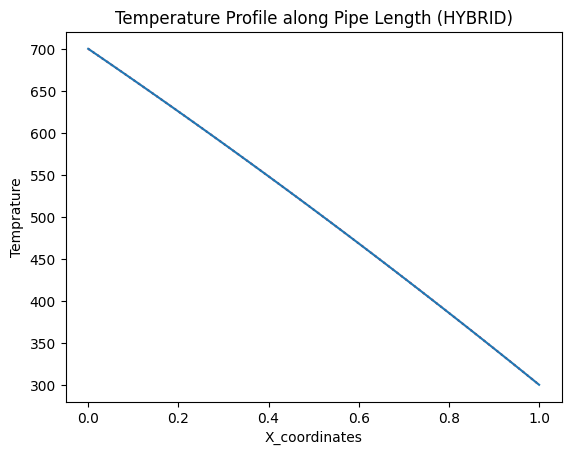

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
  #print(type(low))
  # print(type(upp))
  P    = np.zeros(num)
  Q    = np.zeros(num)
  # print(P.shape)

  # Forward elimination
  P[0] = -upp[0]/dia[0]
  Q[0] =  uPrev[0]/dia[0]
  for i in range(1, mesh_points):
    # print(type(dia[i]))
    # print(type(low[i]))
    # print(type(P[i]))
    P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
    Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

  # Backward Substitution
  u[-1] = Q[-1]
  for i in range(mesh_points-2,-1,-1):
    u[i] = P[i]*u[i+1]+Q[i]
  return u

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat


#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)

#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
Pe = Fe / De
Pw = Fw / Dw


#Now we will start defining our l,u,d array for TDMA application
d  = np.zeros(mesh_points)        # main diagonal elements
u  = np.zeros(mesh_points)        # upper diagonal
l  = np.zeros(mesh_points)        # lower diagonal

# Construct the elements of the coefficient matrix
l[0]  = 0.0
u[0]  = 0.0
d[0]  = 1.0
l[-1] = 0.0
u[-1] = 0.0
d[-1] = 1.0

for i in range(1,mesh_points-1):

  if (Pe<-2):
    ae = -Fe
  elif ((-2 <= Pe) and (Pe <= 2)):
    ae = De - (Fe/2)
  else:
    ae = 0

  if (Pw<-2):
    aw = 0
  elif ((-2 <= Pw) and (Pw <= 2)):
    aw = Dw + (Fw/2)
  else:
    aw = Fw

  ap = ae + aw + (Fe - Fw)

  d[i] =  ap
  l[i] = -aw
  u[i] = -ae

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit
for i in range(1,mesh_points-1):
  RHS[i] = 0

#Lets use TDMA to get Temperature profile
Temp_profile = np.zeros(mesh_points)
Temp_profile = tdma(mesh_points, d, u, l, RHS, Temp_profile)
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temprature")
plt.title("Temperature Profile along Pipe Length (HYBRID)")

QUESTION 1 (UPWIND)

Enter the value of the thermal conductivity (K): 40.7
Enter the value of the average velocity (u_avg):  0.01
Enter the number of mesh points: 101
Error is:  0.005282792142328495


Text(0.5, 1.0, 'Temperature Profile along Pipe Length (UPWIND)')

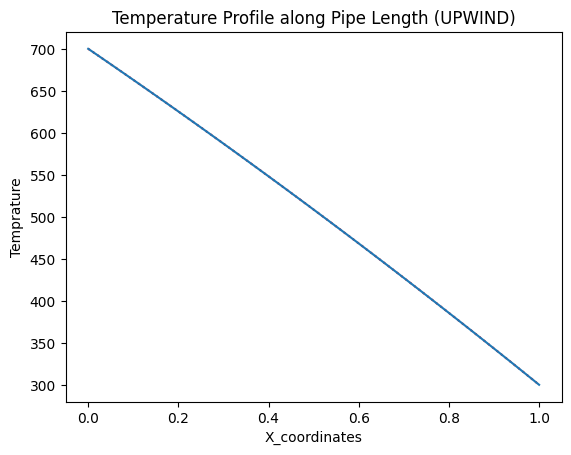

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
  #print(type(low))
  # print(type(upp))
  P    = np.zeros(num)
  Q    = np.zeros(num)
  # print(P.shape)

  # Forward elimination
  P[0] = -upp[0]/dia[0]
  Q[0] =  uPrev[0]/dia[0]
  for i in range(1, mesh_points):
    # print(type(dia[i]))
    # print(type(low[i]))
    # print(type(P[i]))
    P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
    Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

  # Backward Substitution
  u[-1] = Q[-1]
  for i in range(mesh_points-2,-1,-1):
    u[i] = P[i]*u[i+1]+Q[i]
  return u

#now we will define our properties in the problem
k = float(input("Enter the value of the thermal conductivity (K): "))
u_avg = float(input("Enter the value of the average velocity (u_avg):  "))
T_mean_entrance = 700 #mean entrance temperature
T_mean_exit = 300 #mean exit temperature
Length = 1.0 #Length of the pipe
Density = 0.6949 #Density of the fluid
c = 1000 #Specific Heat

#Now lets write the grid specifications
mesh_points = int(input("Enter the number of mesh points: "))
X = np.linspace(0,Length,mesh_points)
dx = Length/(mesh_points-1)

#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma / dx
Dw = Gamma / dx
Fe = Density * u_avg
Fw = Density * u_avg
ae = De
aw = Dw + Fw
ap = ae + aw + (Fe - Fw)

#Now we will start defining our l,u,d array for TDMA application
d  = np.zeros(mesh_points)        # main diagonal elements
u  = np.zeros(mesh_points)        # upper diagonal
l  = np.zeros(mesh_points)        # lower diagonal

# Construct the elements of the coefficient matrix
l[0]  = 0.0
u[0]  = 0.0
d[0]  = 1.0
l[-1] = 0.0
u[-1] = 0.0
d[-1] = 1.0
for i in range(1,mesh_points-1):
  d[i] =  ap
  l[i] = -aw
  u[i] = -ae

# Construct the elements of the Uprev matrix
RHS = np.zeros(mesh_points)
RHS[0]  = T_mean_entrance
RHS[-1] = T_mean_exit
for i in range(1,mesh_points-1):
  RHS[i] = 0

#Lets use TDMA to get Temperature profile
Temp_profile = np.zeros(mesh_points)
Temp_profile = tdma(mesh_points, d, u, l, RHS, Temp_profile)
analytical_soln(k,u_avg,mesh_points,Temp_profile)
plt.plot(X,Temp_profile)
plt.xlabel("X_coordinates")
plt.ylabel("Temprature")
plt.title("Temperature Profile along Pipe Length (UPWIND)")

QUESTION 2 (CDS) (W/O DMD)

Enter the number of mesh points (xlength): 150
Enter the number of mesh points (ylength): 50
50.87527386086067
26.25392972512402
14.168523312997408
10.612688196696627
8.036694658753802
6.825927442738582
5.827356966019611
5.079921200687476
4.545500982996316
4.2468331872980265
4.007280289290378
3.8581923792576944
3.686978579474289
3.5709868645688694
3.5994209371866823
3.5632705932439457
3.4734867504691636
3.342784279439968
3.3180053803286533
3.3399661300306853
3.3132962281047647
3.2439220924978613
3.1417782646266232
3.1266524132148312
3.1345173296853517
3.10732803402567
3.0457489723893048
2.9574720239668935
2.96195129630555
2.96072300593611
2.9266059259087456
2.8666315079603137
2.79838471395853
2.8154810424978827
2.8046208857561936
2.7660248375674286
2.705042986554531
2.681243116185396
2.6841985274224633
2.663319741364411
2.6192501125714998
2.560639116583662
2.5734395847036744
2.5637007598213586
2.5334547911826277
2.4838629627602415
2.4718597942677007
2.4709766491629708
2.449726726243824

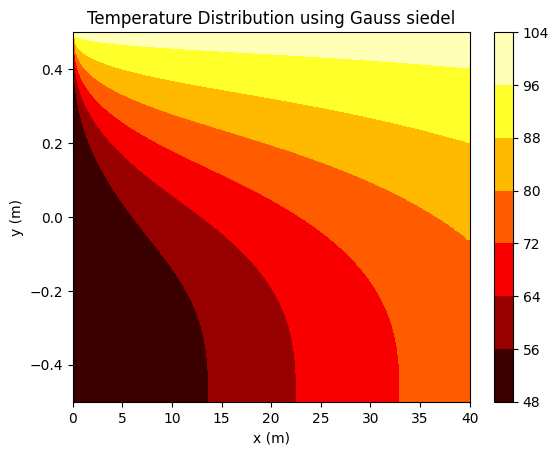

'\nPe = Density*u_avg*Length/Gamma\nRe = Density*u_avg*2/\nfor n in range(1,100,2):\n  sum = sum+ [2*(100-50) *mt.exp(-n*mt.pi/2) *sin(n*mt.pi*y[i]) / (n*mt.pi* (100* Pe + sin(n*mt.pi)))] *mt.exp(-(n**2) *((mt.pi)**2)* k*x / (Height**2)*Density*c *Re))\nfor i in range(no_mesh_y):\n  for j in range(no_mesh_x):\n    Temp_profile_ana[i][j]=  100 - (100-50) *(mt.exp(-Pe*(y[i]-0.5)) - 50 exp(-Pe *y[i]) )+ sum\nprint(Temp_profile_ana)\n'

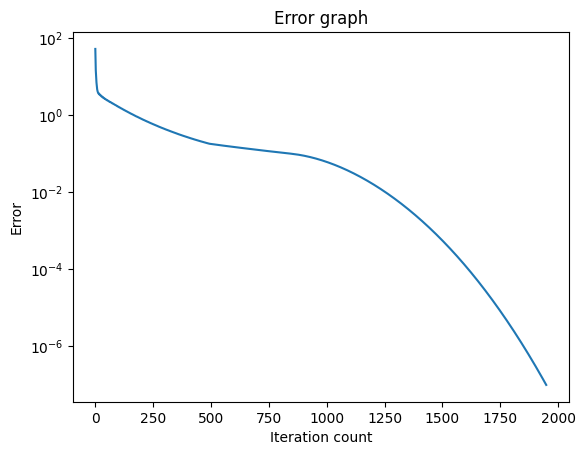

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
    P    = np.zeros(num)
    Q    = np.zeros(num)

    # Forward elimination
    P[0] = -upp[0]/dia[0]
    Q[0] =  uPrev[0]/dia[0]
    for i in range(1, len(dia)):
        P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
        Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

    # Backward Substitution
    u[-1] = Q[-1]
    for i in range(len(dia)-2,-1,-1):
        u[i] = P[i]*u[i+1]+Q[i]
    return u

#now we will define our properties in the problem
k = 1
T_up_plate = 100 #mean entrance temperature
T_mean_entrance = 50 #mean exit temperature
Height = 1.0 #Vertical distance between the plates
Length = 40 #Length of the channel
Density = 1.0 #Density of the fluid
c = 100 #Specific Heat
u_avg = 1.5/2

#Now lets write the grid specifications
no_mesh_x = int(input("Enter the number of mesh points (xlength): "))
no_mesh_y = int(input("Enter the number of mesh points (ylength): "))
#Pos = [[None for j in range(no_mesh_x)] for i in range(no_mesh_y)] #This array stores the position of nodes
dx = Length / (no_mesh_x - 1)
dy = Height / (no_mesh_y - 1)

#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma * dy / dx
Dw = Gamma * dy / dx
Dn = Gamma * dx / dy
Ds = Gamma * dx / dy


#Lets define our Temperature arrays
T_old =np.zeros((no_mesh_y,no_mesh_x))
T_new = np.zeros((no_mesh_y,no_mesh_x))
T_guess = np.zeros((no_mesh_y,no_mesh_x))

T_guess[:,0]  = 50
T_guess[-1,:] = 100


x = np.linspace(0,Length,no_mesh_x)
y = np.linspace(-Height/2, Height/2, no_mesh_y)
#To capture error
error=[]
err = np.zeros((no_mesh_y,no_mesh_x))

#INITIALIZATION OF BOTH THE ITERABLE ARRAYS
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_old[i][j]= T_guess[i][j]

for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_new[i][j]= T_guess[i][j]

#Lets define Boundary Conditions function
def apply_bc(T):
  T[:,0]  = 50
  T[-1,:] = 100
  T[0]  = T[1]
  T[:,-1] = T[:,-2]

#Lets define the function for the u
def velocity(y_cor):
  return 1.5 * (1 - 4 * (y_cor**2))

#LETS START THE SOLUTION

converged = False
tol =0.0000001
#print(T_new)

while (converged<=False):
  #print(T_new)
  for i in range(1,no_mesh_y-1):
    for j in range(1,no_mesh_x-1):
      Fe = Density * velocity(y[i]) * dy
      Fw = Density * velocity(y[i]) * dy
      Fn = 0
      Fs = 0
      Ae = De - (Fe / 2)
      Aw = Dw + (Fw / 2)
      An = Dn - (Fn / 2)
      As = Ds + (Fs / 2)
      Ap = Ae + Aw + An + As
      T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
  apply_bc(T_new)

  #print(T_new)
  for i in range(0,no_mesh_y):
    for j in range(0,no_mesh_x):
      err[i][j]= abs(T_new[i][j] - T_old[i][j])
  print(np.max(err))
  error.append(np.max(err))
  #print(np.max(err))
  if (np.max(err) < tol): #setting up the convergence criterion
    converged = True
  #print(err)
  for i in range(no_mesh_y):
    for j in range(no_mesh_x):
      T_old[i][j]= T_new[i][j]

iter = np.array(np.arange(1,len(error)+1,1))
iter=np.array(iter)
#print(iter)
#error=np.array(error)
#print(error)
T_new = np.array(T_new)

X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, T_new, cmap='hot')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Temperature Distribution using Gauss siedel')
plt.show()
plt.plot(iter,error)
plt.xlabel('Iteration count')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error graph')
Temp_profile_ana = np.zeros((no_mesh_y,no_mesh_x))
sum = 0
'''
Pe = Density*u_avg*Length/Gamma
Re = Density*u_avg*2/
for n in range(1,100,2):
  sum = sum+ [2*(100-50) *mt.exp(-n*mt.pi/2) *sin(n*mt.pi*y[i]) / (n*mt.pi* (100* Pe + sin(n*mt.pi)))] *mt.exp(-(n**2) *((mt.pi)**2)* k*x / (Height**2)*Density*c *Re))
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    Temp_profile_ana[i][j]=  100 - (100-50) *(mt.exp(-Pe*(y[i]-0.5)) - 50 exp(-Pe *y[i]) )+ sum
print(Temp_profile_ana)
'''


QUESTION 2 (CDS) (With DMD)

Enter the number of mesh points (xlength): 150
Enter the number of mesh points (ylength): 50
50.87527386086067
26.25392972512402
14.168523312997408
10.612688196696627
8.036694658753802
6.825927442738582
5.827356966019611
5.079921200687476
4.545500982996316
4.2468331872980265
4.007280289290378
3.8581923792576944
3.686978579474289
3.5709868645688694
3.5994209371866823
3.5632705932439457
3.4734867504691636
3.342784279439968
3.3180053803286533
3.3399661300306853
3.3132962281047647
3.2439220924978613
3.1417782646266232
3.1266524132148312
3.1345173296853517
3.10732803402567
3.0457489723893048
2.9574720239668935
2.96195129630555
2.96072300593611
2.9266059259087456
2.8666315079603137
2.79838471395853
2.8154810424978827
2.8046208857561936
2.7660248375674286
2.705042986554531
2.681243116185396
2.6841985274224633
2.663319741364411
2.6192501125714998
2.560639116583662
2.5734395847036744
2.5637007598213586
2.5334547911826277
2.4838629627602415
2.4718597942677007
2.4709766491629708
2.449726726243824

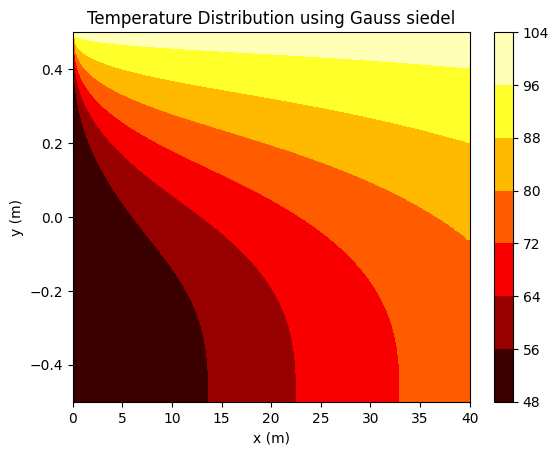

'\nPe = Density*u_avg*Length/Gamma\nRe = Density*u_avg*2/\nfor n in range(1,100,2):\n  sum = sum+ [2*(100-50) *mt.exp(-n*mt.pi/2) *sin(n*mt.pi*y[i]) / (n*mt.pi* (100* Pe + sin(n*mt.pi)))] *mt.exp(-(n**2) *((mt.pi)**2)* k*x / (Height**2)*Density*c *Re))\nfor i in range(no_mesh_y):\n  for j in range(no_mesh_x):\n    Temp_profile_ana[i][j]=  100 - (100-50) *(mt.exp(-Pe*(y[i]-0.5)) - 50 exp(-Pe *y[i]) )+ sum\nprint(Temp_profile_ana)\n'

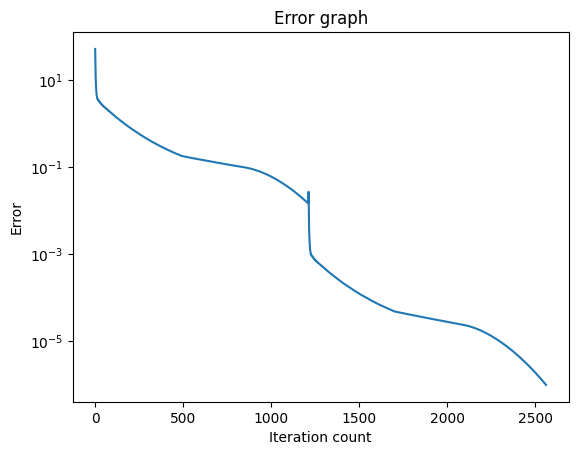

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time

def transpose(matrix):
    # Calculate the transpose of the matrix
    rows, cols = len(matrix), len(matrix[0])
    return [[matrix[j][i] for j in range(rows)] for i in range(cols)]

def matrix_multiply(matrix1, matrix2):
    # Calculate the matrix multiplication of two matrices
    rows1, cols1 = len(matrix1), len(matrix1[0])
    rows2, cols2 = len(matrix2), len(matrix2[0])

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]

    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

def inverse(matrix):
    # Calculate the inverse of a 2x2 matrix
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    determinant = a * d - b * c

    if determinant == 0:
        raise ValueError("Matrix is not invertible.")

    return [[d / determinant, -b / determinant], [-c / determinant, a / determinant]]

def pseudo_inverse(matrix):
    rows, cols = len(matrix), len(matrix[0])

    if rows >= cols:
        # Calculate the pseudo-inverse directly
        ATA = matrix_multiply(transpose(matrix), matrix)
        ATA_inv = inverse(ATA)
        A_pseudo_inv = matrix_multiply(ATA_inv, transpose(matrix))
    else:
        # Calculate the pseudo-inverse of the transpose
        AT = transpose(matrix)
        ATA = matrix_multiply(AT, matrix)
        ATA_inv = inverse(ATA)
        A_pseudo_inv = matrix_multiply(AT, ATA_inv)

    return A_pseudo_inv

#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2
def DMDsolver(X_given,r,no_predictions,dt):
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :]
  #R, C = X.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  U, E, Vt = np.linalg.svd(X1, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  """In the next step we obtain the matrix A_bar which is an second and important step in DMD algo, this matrix is obtained by multiplication
  of the truncated  matrices"""
  A_bar = np.matmul((np.matmul(np.matmul(U[:, : r].conj().T,X2),Vt[: r, :].conj().T)),np.diag(np.reciprocal(E[: r])))
  '''In the following step we obtain the eigen decomposition of the matrix A_bar into two matrices Phi and Q representing eigen values
  and eigen vectors matrices respectively'''
  Phi, Q = np.linalg.eig(A_bar)
  '''The following step we find Psi matrix in order to find A matrix '''
  Psi=np.matmul(np.matmul(np.matmul(X2,Vt[: r, :].conj().T),np.diag(np.reciprocal(E[: r]))),Q) #dmd mode
  #Here we go to the final step of finding our matrix A which is the root of DMD prediction
  A=np.matmul(np.matmul(Psi,np.diag(Phi)),np.linalg.pinv(Psi)) #not needed from this line for finite differences
  x2 = X2[:,-1]
  #print(Psi)
  bi = (np.matmul(pseudo_inverse(Psi),x2))
  dd1 = ((bi[0])*(Psi[:,0])).real

  dd2 = ((bi[1])*(Psi[:,1])).real
  '''
  dd3 = ((bi[2])*(Psi[:,2])).real
  dd4 = ((bi[3])*(Psi[:,3])).real
  '''
  dd5 = np.zeros(len(dd1))
  for i in range(len(dd1)):
   dd5[i] = dd1[i] #+ dd2[i] #+ dd3[i] #+dd4[i]
  return dd5 #returning predicted values matrix

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
    P    = np.zeros(num)
    Q    = np.zeros(num)

    # Forward elimination
    P[0] = -upp[0]/dia[0]
    Q[0] =  uPrev[0]/dia[0]
    for i in range(1, len(dia)):
        P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
        Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

    # Backward Substitution
    u[-1] = Q[-1]
    for i in range(len(dia)-2,-1,-1):
        u[i] = P[i]*u[i+1]+Q[i]
    return u

#now we will define our properties in the problem
k = 1
T_up_plate = 100 #mean entrance temperature
T_mean_entrance = 50 #mean exit temperature
Height = 1.0 #Vertical distance between the plates
Length = 40 #Length of the channel
Density = 1.0 #Density of the fluid
c = 100 #Specific Heat
u_avg = 1.5/2

#Now lets write the grid specifications
no_mesh_x = int(input("Enter the number of mesh points (xlength): "))
no_mesh_y = int(input("Enter the number of mesh points (ylength): "))
#Pos = [[None for j in range(no_mesh_x)] for i in range(no_mesh_y)] #This array stores the position of nodes
dx = Length / (no_mesh_x - 1)
dy = Height / (no_mesh_y - 1)

#now we will define our constants in the problem
Gamma = k / (c)
De = Gamma * dy / dx
Dw = Gamma * dy / dx
Dn = Gamma * dx / dy
Ds = Gamma * dx / dy


#Lets define our Temperature arrays
T_old =np.zeros((no_mesh_y,no_mesh_x))
T_new = np.zeros((no_mesh_y,no_mesh_x))
T_guess = np.zeros((no_mesh_y,no_mesh_x))

T_guess[:,0]  = 50
T_guess[-1,:] = 100


x = np.linspace(0,Length,no_mesh_x)
y = np.linspace(-Height/2, Height/2, no_mesh_y)
#To capture error
error=[]
err = np.zeros((no_mesh_y,no_mesh_x))

#INITIALIZATION OF BOTH THE ITERABLE ARRAYS
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_old[i][j]= T_guess[i][j]

for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_new[i][j]= T_guess[i][j]

#Lets define Boundary Conditions function
def apply_bc(T):
  T[:,0]  = 50
  T[-1,:] = 100
  T[0]  = T[1]
  T[:,-1] = T[:,-2]

#Lets define the function for the u
def velocity(y_cor):
  return 1.5 * (1 - 4 * (y_cor**2))

#LETS START THE SOLUTION

converged = False
tol =0.0000001
iter        = 0           # Iteration counter
sub_list = list([])       # Making a list to store the difference between the two arrays
Y=np.zeros((no_mesh_y*no_mesh_x,20))
lo = 1
PPP=0
norm = 100
ic = 1
columncounter = 0

start_time = time.time()

while (converged<=False):
  if ((norm>0.1) and (PPP<=1)):
    #print(T_new)
    for i in range(1,no_mesh_y-1):
      for j in range(1,no_mesh_x-1):
        Fe = Density * velocity(y[i]) * dy
        Fw = Density * velocity(y[i]) * dy
        Fn = 0
        Fs = 0
        Ae = De - (Fe / 2)
        Aw = Dw + (Fw / 2)
        An = Dn - (Fn / 2)
        As = Ds + (Fs / 2)
        Ap = Ae + Aw + An + As
        T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
    apply_bc(T_new)

    #print(T_new)
    for i in range(0,no_mesh_y):
      for j in range(0,no_mesh_x):
        err[i][j]= abs(T_new[i][j] - T_old[i][j])
    #print(err)
    error.append(np.max(err))
    norm = np.max(err)
    #print(np.max(err))
    if (np.max(err) < tol): #setting up the convergence criterion
      converged = True
    #print(err)
    for i in range(no_mesh_y):
      for j in range(no_mesh_x):
        T_old[i][j]= T_new[i][j]
    iter = iter + 1
    nu = iter
    ic = iter
    print(norm)

  else:
    #print(u_old,903480935874)
    PPP = 5

    if (norm<=10**-6):
      converged = True
    if ((iter==nu) and (lo<=20) and (iter==ic)):
      vectorized_T_old = T_old.reshape(-1, 1)
      for ix in range(0,no_mesh_y*no_mesh_x):
        Y[ix][columncounter] = vectorized_T_old[ix]
      columncounter = columncounter + 1
      nu=nu+20
      ic=ic+20
      if (lo==20):
        #print(1111111111123456789999999999999998765)
        Y = np.array(Y)
        #Y = Y.transpose()
        T_old = DMDsolver(Y,5,1,1)
        T_old = T_old.reshape(no_mesh_y,no_mesh_x)
        for i in range(no_mesh_y):
          for j in range(no_mesh_x):
            T_new[i][j]= T_old[i][j]
        ic = ic + 30000000000000000000000000000000000000000000000000000000000
        nu = iter
        columncounter = 0
        Y=np.zeros((no_mesh_y*no_mesh_x,20))
        #print(nu,ic,iter)
        lo = 0
      lo=lo+1

    for i in range(1,no_mesh_y-1):
      for j in range(1,no_mesh_x-1):
        Fe = Density * velocity(y[i]) * dy
        Fw = Density * velocity(y[i]) * dy
        Fn = 0
        Fs = 0
        Ae = De - (Fe / 2)
        Aw = Dw + (Fw / 2)
        An = Dn - (Fn / 2)
        As = Ds + (Fs / 2)
        Ap = Ae + Aw + An + As
        T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
    apply_bc(T_new)

    #print(T_new)
    for i in range(0,no_mesh_y):
      for j in range(0,no_mesh_x):
        err[i][j]= abs(T_new[i][j] - T_old[i][j])
    #print(err)
    error.append(np.max(err))
    norm = np.max(err)
    #print(np.max(err))
    if (np.max(err) < tol): #setting up the convergence criterion
      converged = True
    #print(err)
    for i in range(no_mesh_y):
      for j in range(no_mesh_x):
        T_old[i][j]= T_new[i][j]

    iter = iter + 1
    if (iter == ic):
      nu =iter
    print(norm)
    print(norm)

iter = np.array(np.arange(1,len(error)+1,1))
iter=np.array(iter)
#print(iter)
#error=np.array(error)
#print(error)
T_new = np.array(T_new)

X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, T_new, cmap='hot')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Temperature Distribution using Gauss siedel')
plt.show()
plt.plot(iter,error)
plt.xlabel('Iteration count')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error graph')
Temp_profile_ana = np.zeros((no_mesh_y,no_mesh_x))
sum = 0
'''
Pe = Density*u_avg*Length/Gamma
Re = Density*u_avg*2/
for n in range(1,100,2):
  sum = sum+ [2*(100-50) *mt.exp(-n*mt.pi/2) *sin(n*mt.pi*y[i]) / (n*mt.pi* (100* Pe + sin(n*mt.pi)))] *mt.exp(-(n**2) *((mt.pi)**2)* k*x / (Height**2)*Density*c *Re))
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    Temp_profile_ana[i][j]=  100 - (100-50) *(mt.exp(-Pe*(y[i]-0.5)) - 50 exp(-Pe *y[i]) )+ sum
print(Temp_profile_ana)
'''


QUESTION 2 (UPWIND)

Enter the number of mesh points (xlength): 150
Enter the number of mesh points (ylength): 50
150
50
51.183054616392425
26.48256321269611
14.380621274880145
10.68084222628292
7.9284333755486145
6.557171800281626
5.763771502881745
5.063149396627345
4.599682566103457
4.200332955664827
3.815586497540174
3.4954096088199833
3.2740433118089634
3.108773399787353
2.9393427785659725
2.800527018906898
2.6577951160312523
2.5103783991771067
2.4158509208965384
2.3433552320490456
2.262334469509515
2.1749935909165714
2.083174261568608
2.0297319306234165
1.9797464826777187
1.9237809603965736
1.8629578624274288
1.8039839472618446
1.7710391508449135
1.7328059753584917
1.6900236818876877
1.6433900405528732
1.611695645909446
1.5841203520293234
1.5524461258414242
1.5171786458062044
1.4864068107160797
1.4655748676680673
1.4410805028980214
1.4133068961750155
1.3853141297837226
1.3689610771364933
1.3493283326728225
1.3267170209249137
1.301818325816189
1.2886008635924142
1.2724282076410205
1.2535437948631376
1.

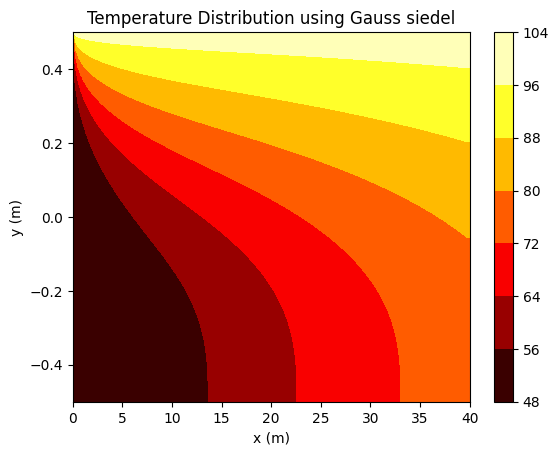

Text(0.5, 1.0, 'Error graph')

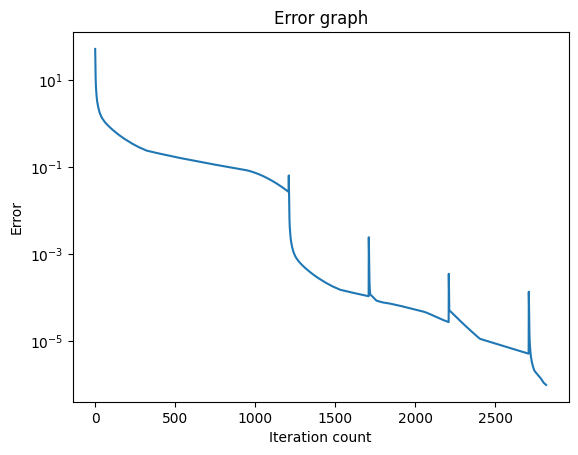

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time

def transpose(matrix):
    # Calculate the transpose of the matrix
    rows, cols = len(matrix), len(matrix[0])
    return [[matrix[j][i] for j in range(rows)] for i in range(cols)]

def matrix_multiply(matrix1, matrix2):
    # Calculate the matrix multiplication of two matrices
    rows1, cols1 = len(matrix1), len(matrix1[0])
    rows2, cols2 = len(matrix2), len(matrix2[0])

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]

    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

def inverse(matrix):
    # Calculate the inverse of a 2x2 matrix
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    determinant = a * d - b * c

    if determinant == 0:
        raise ValueError("Matrix is not invertible.")

    return [[d / determinant, -b / determinant], [-c / determinant, a / determinant]]

def pseudo_inverse(matrix):
    rows, cols = len(matrix), len(matrix[0])

    if rows >= cols:
        # Calculate the pseudo-inverse directly
        ATA = matrix_multiply(transpose(matrix), matrix)
        ATA_inv = inverse(ATA)
        A_pseudo_inv = matrix_multiply(ATA_inv, transpose(matrix))
    else:
        # Calculate the pseudo-inverse of the transpose
        AT = transpose(matrix)
        ATA = matrix_multiply(AT, matrix)
        ATA_inv = inverse(ATA)
        A_pseudo_inv = matrix_multiply(AT, ATA_inv)

    return A_pseudo_inv

#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2
def DMDsolver(X_given,r,no_predictions,dt):
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :]
  #R, C = X.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  U, E, Vt = np.linalg.svd(X1, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  """In the next step we obtain the matrix A_bar which is an second and important step in DMD algo, this matrix is obtained by multiplication
  of the truncated  matrices"""
  A_bar = np.matmul((np.matmul(np.matmul(U[:, : r].conj().T,X2),Vt[: r, :].conj().T)),np.diag(np.reciprocal(E[: r])))
  '''In the following step we obtain the eigen decomposition of the matrix A_bar into two matrices Phi and Q representing eigen values
  and eigen vectors matrices respectively'''
  Phi, Q = np.linalg.eig(A_bar)
  '''The following step we find Psi matrix in order to find A matrix '''
  Psi=np.matmul(np.matmul(np.matmul(X2,Vt[: r, :].conj().T),np.diag(np.reciprocal(E[: r]))),Q) #dmd mode
  #Here we go to the final step of finding our matrix A which is the root of DMD prediction
  A=np.matmul(np.matmul(Psi,np.diag(Phi)),np.linalg.pinv(Psi)) #not needed from this line for finite differences
  x2 = X2[:,-1]
  #print(Psi)
  bi = (np.matmul(pseudo_inverse(Psi),x2))
  dd1 = ((bi[0])*(Psi[:,0])).real
  '''
  dd2 = ((bi[1])*(Psi[:,1])).real
  dd3 = ((bi[2])*(Psi[:,2])).real
  dd4 = ((bi[3])*(Psi[:,3])).real
  '''
  dd5 = np.zeros(len(dd1))
  for i in range(len(dd1)):
   dd5[i] = dd1[i] #+ dd2[i] + dd3[i] #+dd4[i]
  return dd5 #returning predicted values matrix

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
    P    = np.zeros(num)
    Q    = np.zeros(num)

    # Forward elimination
    P[0] = -upp[0]/dia[0]
    Q[0] =  uPrev[0]/dia[0]
    for i in range(1, len(dia)):
        P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
        Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

    # Backward Substitution
    u[-1] = Q[-1]
    for i in range(len(dia)-2,-1,-1):
        u[i] = P[i]*u[i+1]+Q[i]
    return u

#now we will define our properties in the problem
k = 1
T_up_plate = 100 #mean entrance temperature
T_mean_entrance = 50 #mean exit temperature
Height = 1.0 #Vertical distance between the plates
Length = 40 #Length of the channel
Density = 1.0 #Density of the fluid
c = 100 #Specific Heat
u_avg = 1.5/2

#Now lets write the grid specifications
no_mesh_x = int(input("Enter the number of mesh points (xlength): "))
no_mesh_y = int(input("Enter the number of mesh points (ylength): "))
#Pos = [[None for j in range(no_mesh_x)] for i in range(no_mesh_y)] #This array stores the position of nodes
dx = Length / (no_mesh_x - 1)
dy = Height / (no_mesh_y - 1)
x = np.linspace(0,Length,no_mesh_x)
y = np.linspace(-Height/2, Height/2, no_mesh_y)

#now we will define our constants in the problem
Gamma = k / (Density * c)
De = Gamma * dy / dx
Dw = Gamma * dy / dx
Dn = Gamma * dx / dy
Ds = Gamma * dx / dy


#Lets define our Temperature arrays
T_old =np.zeros((no_mesh_y,no_mesh_x))
T_new = np.zeros((no_mesh_y,no_mesh_x))
T_guess = np.zeros((no_mesh_y,no_mesh_x))

T_guess[:,0]  = 50
T_guess[-1,:] = 100

print(no_mesh_x)
print(no_mesh_y)
#To capture error
error=[]
err = np.zeros((no_mesh_y,no_mesh_x))

#INITIALIZATION OF BOTH THE ITERABLE ARRAYS
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_old[i][j]= T_guess[i][j]

for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_new[i][j]= T_guess[i][j]

#Lets define Boundary Conditions function
def apply_bc(T):
  T[:,0]  = 50
  T[-1,:] = 100
  T[0]  = T[1]
  T[:,-1] = T[:,-2]

#Lets define the function for the u
def velocity(y_cor):
  return 1.5 * (1 - 4 * (y_cor**2))

#LETS START THE SOLUTION

converged = False
tol =0.0000001
iter        = 0           # Iteration counter
sub_list = list([])       # Making a list to store the difference between the two arrays
Y=np.zeros((no_mesh_y*no_mesh_x,20))
lo = 1
PPP=0
norm = 100
ic = 1
columncounter = 0

start_time = time.time()
#print(T_new)
while (converged<=False):
  if ((norm>10**-1) and (PPP<=1)):
    #print(T_new)
    for i in range(1,no_mesh_y-1):
      for j in range(1,no_mesh_x-1):
        Fe = Density * velocity(y[i]) * dy
        Fw = Density * velocity(y[i]) * dy
        Fn = 0
        Fs = 0
        Ae = De
        Aw = Dw + (Fw)
        An = Dn
        As = Ds + (Fs)
        Ap = Ae + Aw + An + As
        T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
    apply_bc(T_new)
    #print(T_new)
    for i in range(0,no_mesh_y):
      for j in range(0,no_mesh_x):
        err[i][j]= abs(T_new[i][j] - T_old[i][j])
    #print(err)
    error.append(np.max(err))
    norm = np.max(err)
    #print(np.max(err))
    if (np.max(err) < tol): #setting up the convergence criterion
      converged = True
    #print(err)
    for i in range(no_mesh_y):
      for j in range(no_mesh_x):
        T_old[i][j]= T_new[i][j]
    iter = iter + 1
    nu = iter
    ic = iter
    print(norm)
  else:
    #print(u_old,903480935874)
    PPP = 5

    if (norm<=10**-6):
      converged = True
    if ((iter==nu) and (lo<=20) and (iter==ic)):
      vectorized_T_old = T_old.reshape(-1, 1)
      for ix in range(0,no_mesh_y*no_mesh_x):
        Y[ix][columncounter] = vectorized_T_old[ix]
      columncounter = columncounter + 1
      nu=nu+20
      ic=ic+20
      if (lo==20):
        #print(1111111111123456789999999999999998765)
        Y = np.array(Y)
        #Y = Y.transpose()
        T_old = DMDsolver(Y,5,1,1)
        T_old = T_old.reshape(no_mesh_y,no_mesh_x)
        for i in range(no_mesh_y):
          for j in range(no_mesh_x):
            T_new[i][j]= T_old[i][j]
        ic = ic + 100
        nu = iter
        columncounter = 0
        Y=np.zeros((no_mesh_y*no_mesh_x,20))
        #print(nu,ic,iter)
        lo = 0
      lo=lo+1
    for i in range(1,no_mesh_y-1):
      for j in range(1,no_mesh_x-1):
        Fe = Density * velocity(y[i]) * dy
        Fw = Density * velocity(y[i]) * dy
        Fn = 0
        Fs = 0
        Ae = De
        Aw = Dw + (Fw)
        An = Dn
        As = Ds + (Fs)
        Ap = Ae + Aw + An + As
        T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
    apply_bc(T_new)
    #print(T_new)
    for i in range(0,no_mesh_y):
      for j in range(0,no_mesh_x):
        err[i][j]= abs(T_new[i][j] - T_old[i][j])
    #print(err)
    error.append(np.max(err))
    norm = np.max(err)
    #print(np.max(err))
    if (np.max(err) < tol): #setting up the convergence criterion
      converged = True
    #print(err)
    for i in range(no_mesh_y):
      for j in range(no_mesh_x):
        T_old[i][j]= T_new[i][j]

    # Increment iteration counter
    iter = iter + 1
    if (iter == ic):
      nu =iter
    print(norm)

iter = np.array(np.arange(1,len(error)+1,1))
iter=np.array(iter)
#print(iter)
error=np.array(error)
#print(error)
T_new = np.array(T_new)
print(T_new)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, T_new, cmap='hot')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Temperature Distribution using Gauss siedel')
plt.show()
plt.plot(iter,error)
plt.xlabel('Iteration count')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error graph')


QUESTION 2 HYBRID

Enter the number of mesh points (xlength): 100
Enter the number of mesh points (ylength): 50
100
50
[[ 50.          50.00002569  50.00021736 ...  75.82026809  76.05523864
   76.05523864]
 [ 50.          50.00002569  50.00021736 ...  75.82026809  76.05523864
   76.05523864]
 [ 50.          50.000026    50.00021973 ...  75.82320186  76.05814418
   76.05814418]
 ...
 [ 50.          84.10312892  89.16469085 ...  98.2784342   98.29521226
   98.29521226]
 [ 50.          91.79318449  94.56520782 ...  99.13916471  99.14755426
   99.14755426]
 [100.         100.         100.         ... 100.         100.
  100.        ]]


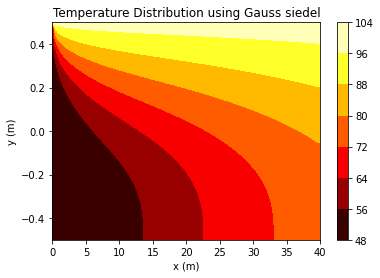

'Temp_profile_ana = np.zeros((no_mesh_y,no_mesh_x))\nfor i in range(no_mesh_y):\n  for j in range(no_mesh_x):\n    Temp_profile_ana[i][j]=  25*(y[i]**2-0.5**2)*((x[j]/40)**2) + 50\nprint(Temp_profile_ana)'

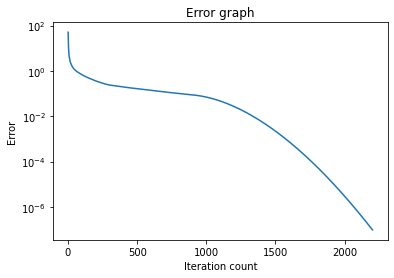

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

#Now we will write the TDMA function
def tdma(num, dia, upp, low, uPrev, u):
    P    = np.zeros(num)
    Q    = np.zeros(num)

    # Forward elimination
    P[0] = -upp[0]/dia[0]
    Q[0] =  uPrev[0]/dia[0]
    for i in range(1, len(dia)):
        P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
        Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

    # Backward Substitution
    u[-1] = Q[-1]
    for i in range(len(dia)-2,-1,-1):
        u[i] = P[i]*u[i+1]+Q[i]
    return u

#now we will define our properties in the problem
k = 1
T_up_plate = 100 #mean entrance temperature
T_mean_entrance = 50 #mean exit temperature
Height = 1.0 #Vertical distance between the plates
Length = 40 #Length of the channel
Density = 1.0 #Density of the fluid
c = 100 #Specific Heat
u_avg = 1.5/2

#Lets define the function for the u
def velocity(y_cor):
  return 1.5 * (1 - 4 * (y_cor**2))

#Now lets write the grid specifications
no_mesh_x = int(input("Enter the number of mesh points (xlength): "))
no_mesh_y = int(input("Enter the number of mesh points (ylength): "))
#Pos = [[None for j in range(no_mesh_x)] for i in range(no_mesh_y)] #This array stores the position of nodes
dx = Length / (no_mesh_x - 1)
dy = Height / (no_mesh_y - 1)
x = np.linspace(0,Length,no_mesh_x)
y = np.linspace(-Height/2, Height/2, no_mesh_y)

#now we will define our constants in the problem
Gamma = k / (Density * c)
De = Gamma * dy / dx
Dw = Gamma * dy / dx
Dn = Gamma * dx / dy
Ds = Gamma * dx / dy



#Lets define our Temperature arrays
T_old =np.zeros((no_mesh_y,no_mesh_x))
T_new = np.zeros((no_mesh_y,no_mesh_x))
T_guess = np.zeros((no_mesh_y,no_mesh_x))

T_guess[:,0]  = 50
T_guess[-1,:] = 100

print(no_mesh_x)
print(no_mesh_y)
#To capture error
error=[]
err = np.zeros((no_mesh_y,no_mesh_x))

#INITIALIZATION OF BOTH THE ITERABLE ARRAYS
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_old[i][j]= T_guess[i][j]

for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    T_new[i][j]= T_guess[i][j]

#Lets define Boundary Conditions function
def apply_bc(T):

  T[:,0]  = 50
  T[-1,:] = 100
  T[0]  = T[1]
  T[:,-1] = T[:,-2]

#LETS START THE SOLUTION
'''
converged = False

tol = 0.000000001
#print(T_new)
while (converged<=False):
  #print(T_new)
  for j in range(1,no_mesh_x-1):
    T_new_free=np.zeros(no_mesh_y)
      # Diagonal elements of system matrix
    d      = np.zeros(no_mesh_y)        # main diagonal elements
    u      = np.zeros(no_mesh_y)        # upper diagonal
    l      = np.zeros(no_mesh_y)        # lower diagonal
    RHS    = np.zeros(no_mesh_y)
    d[0]   = -1
    u[0]   = 1
    l[0]   = 0
    RHS[0] = 0
    d[-1]  = 1
    u[-1]  = 0
    l[-1]  = 0
    RHS[-1]= 100
    for i in range(1,no_mesh_y-1):
      d[i]   =  Ap
      u[i]   = -An
      l[i]   = -As
      RHS[i] = Aw* T_new[i][j-1] + Ae* T_new[i][j+1]
    T_new_free = tdma(no_mesh_y, d, u, l, RHS, T_new_free)
    for i in range(0,no_mesh_y):
      T_new[i][j]=T_new_free[i]
  T_new[0] = T_new[1]
  T_new[:,-1] = T_new[:,-2]

  for i in range(0,no_mesh_y):
    for j in range(0,no_mesh_x):
      err[i][j]= abs(T_new[i][j] - T_old[i][j]) # absolute error calculation

  error.append(np.max(err))

  if (np.max(err) < tol): #setting up the convergence criterion
    converged = True

  for i in range(no_mesh_y):
    for j in range(no_mesh_x):
      T_old[i][j]= T_new[i][j]
'''
converged = False
tol =0.0000001
Pe = 0
#print(T_new)
while (converged<=False):
  #print(T_new)
  for i in range(1,no_mesh_y-1):

    for j in range(1,no_mesh_x-1):

      Fe = Density * velocity(y[i]) * dy
      Fw = Density * velocity(y[i]) * dy
      Fn = 0
      Fs = 0
      Pee = Fe/De
      Pew = Fw/Dw
      Pen = Fn/Dn
      Pes = Fs/Ds

      if (Pee<-2):
        Ae = -Fe
      elif ((-2 <= Pee) and (Pee <= 2)):
        Ae = De - (Fe/2)
      else:
        Ae = 0

      if (Pew<-2):
        Aw = 0
      elif ((-2 <= Pew) and (Pew <= 2)):
        Aw = Dw + (Fw/2)
      else:
        Aw = Fw

      if (Pen<-2):
        An = -Fn
      elif ((-2 <= Pen) and (Pen <= 2)):
        An = Dn - (Fn/2)
      else:
        An = 0

      if (Pes<-2):
        As = 0
      elif ((-2 <= Pes) and (Pes <= 2)):
        As = Ds + (Fs/2)
      else:
        As = Fs

      Ap = Ae + Aw + An + As

      T_new[i][j]= ((An/Ap)*T_new[i+1][j] + (As/Ap)*T_new[i-1][j] + (Ae/Ap)*T_new[i][j+1] + (Aw/Ap)*T_new[i][j-1])
  apply_bc(T_new)
  #print(T_new)
  for i in range(0,no_mesh_y):
    for j in range(0,no_mesh_x):
      err[i][j]= abs(T_new[i][j] - T_old[i][j])
  #print(err)
  error.append(np.max(err))
  #print(np.max(err))
  if (np.max(err) < tol): #setting up the convergence criterion
    converged = True
  #print(err)
  for i in range(no_mesh_y):
    for j in range(no_mesh_x):
      T_old[i][j]= T_new[i][j]

iter = np.array(np.arange(1,len(error)+1,1))
iter=np.array(iter)
#print(iter)
error=np.array(error)
#print(error)
T_new = np.array(T_new)
print(T_new)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, T_new, cmap='hot')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Temperature Distribution using Gauss siedel')
plt.show()
plt.plot(iter,error)
plt.xlabel('Iteration count')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Error graph')
'''Temp_profile_ana = np.zeros((no_mesh_y,no_mesh_x))
for i in range(no_mesh_y):
  for j in range(no_mesh_x):
    Temp_profile_ana[i][j]=  25*(y[i]**2-0.5**2)*((x[j]/40)**2) + 50
print(Temp_profile_ana)'''